In [1]:

import pandas as pd

In [2]:
# first we load the dataset
df = pd.read_csv("BigBasket Products1.csv")
# Displaying the first few rows
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [3]:
# Dataset structure and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [4]:
# Shape of the dataset
print("Shape:", df.shape)

Shape: (27555, 10)


In [5]:
#getting some more info
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [6]:
# Counting of null values in each column
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [7]:
# handeling duplicate rows
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


In [8]:
# fixing price format
def clean_price(price):
    if pd.isnull(price):
        return None
    return float(str(price).replace('₹', '').replace(',', '').strip())

In [9]:
# Cleaning Inconsistent Values
# Removing extra spaces and unify case
df['product'] = df['product'].astype(str).str.strip()
# Striping whitespace and standardize case (capitalize first letter of each word)
df['brand'] = df['brand'].astype(str).str.strip().str.title()


In [10]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


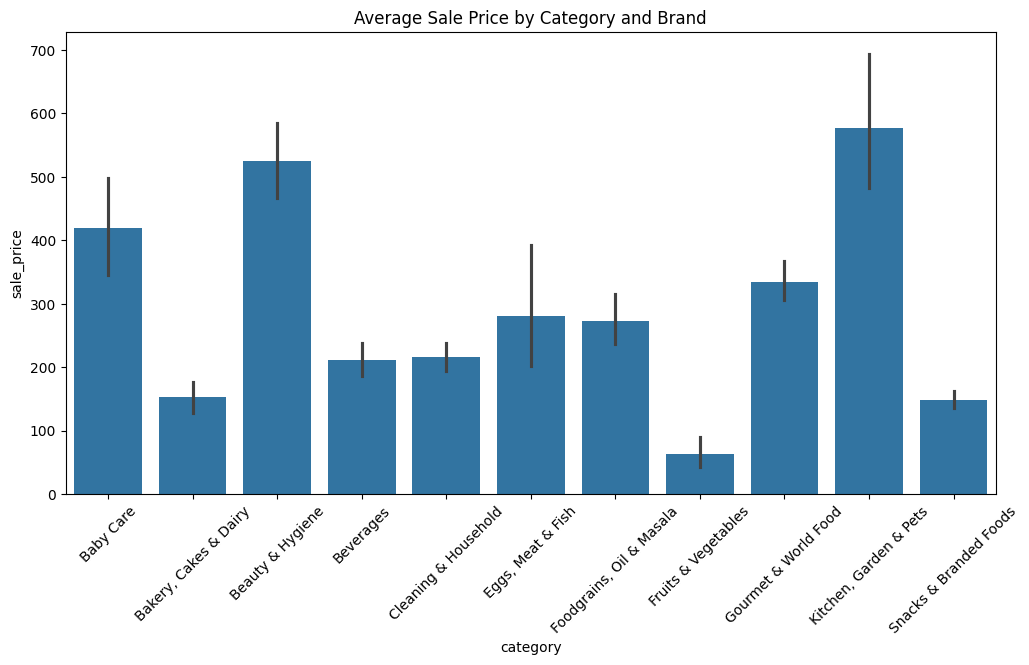

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (assuming it's saved as df)
# df = pd.read_csv('yourfile.csv')

# Group and plot
grouped = df.groupby(['category', 'brand'])['sale_price'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='category', y='sale_price')
plt.title('Average Sale Price by Category and Brand')
plt.xticks(rotation=45)
plt.show()


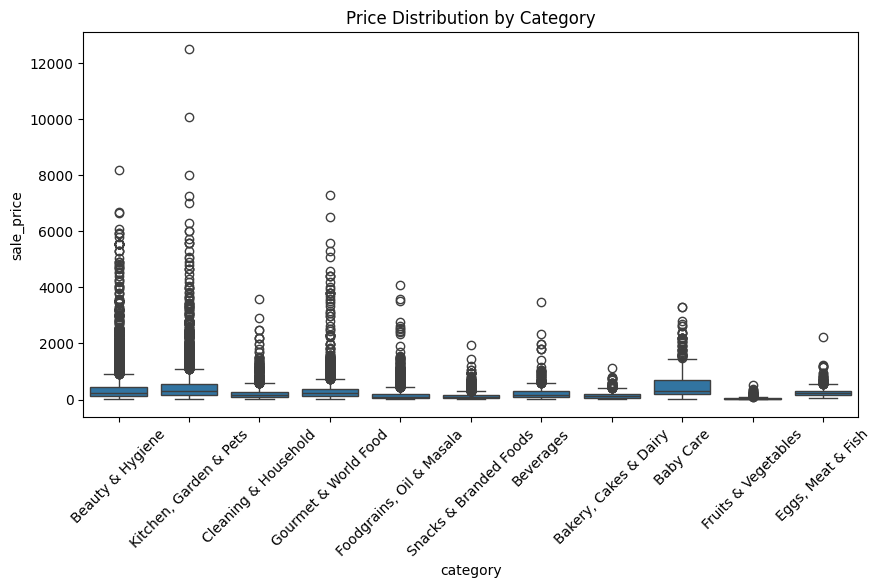

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='category', y='sale_price')
plt.xticks(rotation=45)
plt.title('Price Distribution by Category')
plt.show()


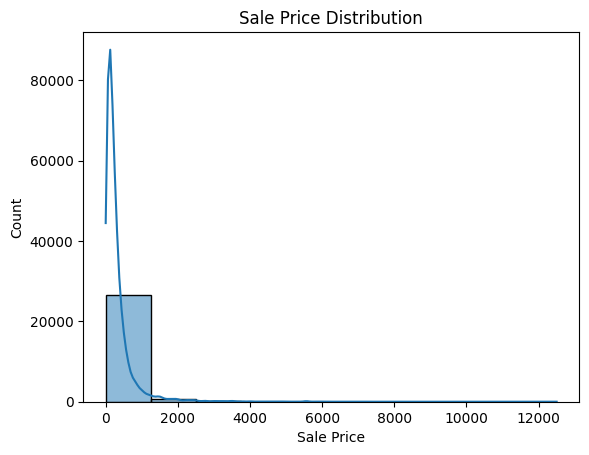

In [15]:
sns.histplot(df['sale_price'], kde=True, bins=10)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()


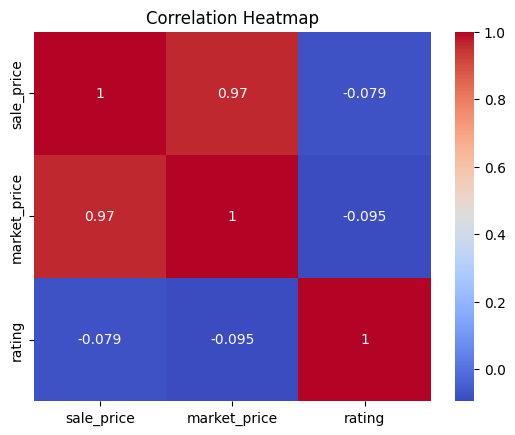

In [16]:
import seaborn as sns

# Filter numeric columns
numeric_df = df[['sale_price', 'market_price', 'rating']]
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Statistics Tasks

In [18]:
from scipy.stats import ttest_ind

# If any unbranded products exist (brand = NaN)
branded = df[df['brand'].notna()]['sale_price']
unbranded = df[df['brand'].isna()]['sale_price']

t_stat, p_val = ttest_ind(branded, unbranded)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: nan, P-value: nan


In [19]:
stats_by_cat = df.groupby('category')['sale_price'].agg(['mean', 'median', 'std'])
print(stats_by_cat)


                                mean   median         std
category                                                 
Baby Care                 534.946180  319.665  536.025430
Bakery, Cakes & Dairy     142.802750  109.000  131.119098
Beauty & Hygiene          418.679197  245.000  590.149182
Beverages                 239.758949  175.000  256.940381
Cleaning & Household      226.173118  159.000  251.044437
Eggs, Meat & Fish         288.897486  230.000  229.284122
Foodgrains, Oil & Masala  193.167500  100.000  277.545142
Fruits & Vegetables        50.889336   32.000   54.261050
Gourmet & World Food      319.854011  239.700  404.909469
Kitchen, Garden & Pets    507.524615  299.000  716.077919
Snacks & Branded Foods    129.593134   87.120  142.283819


In [20]:
from scipy.stats import f_oneway

anova_groups = [group['sale_price'] for name, group in df.groupby('category')]
f_stat, p_value = f_oneway(*anova_groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 215.23891558654034, P-value: 0.0
